In [1]:
import torch

from src.sde import VE_SDE, VP_SDE, SubVP_SDE
from src.unet import Unet

In [2]:
device = torch.device('cuda:3')

model = Unet(
    dim=28,
    dim_mults=(1, 2, 4),
    channels=1
).to(device)
model.load_state_dict(torch.load('ckpts/subvp.ckpt'))

sde = SubVP_SDE(eps=1e-3, rescale=True).to(device)

In [7]:
samples = sde.predictor_corrector_sample(model, (32, 1, 28, 28), device, n_lang_steps=2)
samples = torch.clamp(samples, 0, 1)

100%|██████████| 500/500 [00:24<00:00, 20.34it/s]


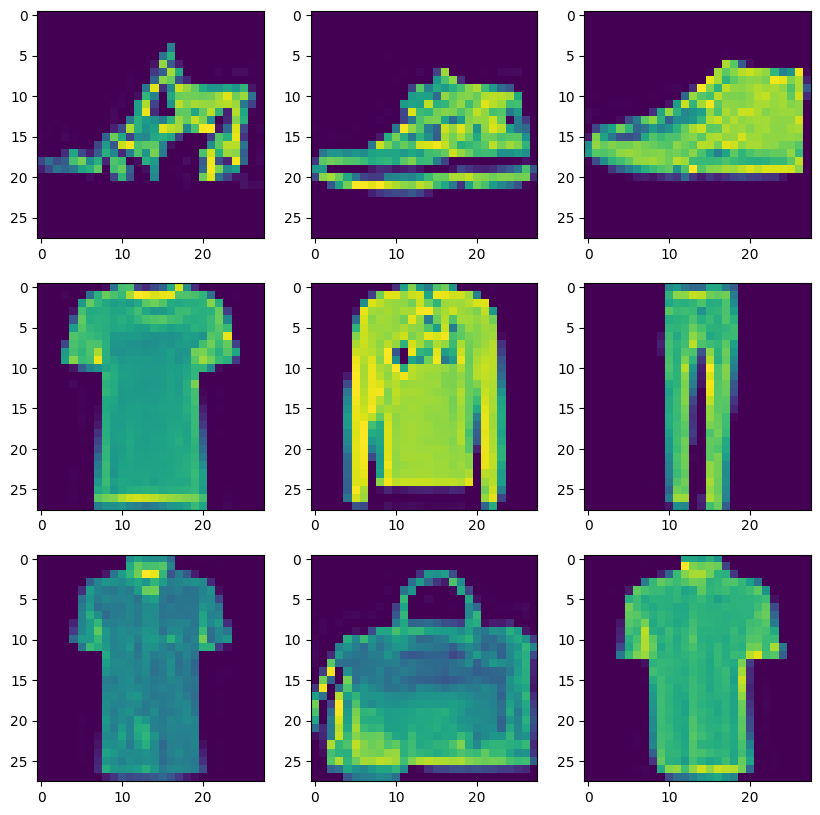

In [8]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

fig = plt.figure(figsize=(10, 10))
for i in range(1, 10):
    fig.add_subplot(3, 3, i)
    plt.imshow(to_pil_image(samples[i]))
plt.show()